In [1]:
import csv
from xml.etree import ElementTree
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.ticker import StrMethodFormatter
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from pyclustertend import hopkins, vat, assess_tendency_by_mean_metric_score
from sklearn.preprocessing import scale, MinMaxScaler, minmax_scale, RobustScaler,robust_scale

In [2]:
def get_data():
    file = "C:/Users/aprodea/work/metrics-tax-compare/merged/merged_filledna.csv"
    data = pd.read_csv(file, sep=';')
    return data

merged_data = get_data()
merged_data

,Method,LOC,CC,NP,NV,NEST,Ca,Ce,NChg,NCall
0,GES_GRT.GES_GRTCoreModule.PreInitialize(),14.0,3.0,0,1.0,1.0,0,2,2.0,4.0
1,GES_GRT.GES_GRTCoreModule.Initialize(),1.0,1.0,0,0.0,0.0,0,0,1.0,4.0
2,GES_GRT.GES_GRTCoreModule.PostInitialize(),2.0,1.0,0,0.0,0.0,0,1,1.0,4.0
3,GES_GRT.GES_GRTDomainServiceBase.GES_GRTDomain...,2.0,1.0,0,0.0,0.0,5,0,1.0,3707.0
4,GES_GRT.GES_GRTServiceBase.GES_GRTServiceBase(),2.0,1.0,0,0.0,0.0,4,0,1.0,2358.0
...,...,...,...,...,...,...,...,...,...,...
799,GES_GRT.Web.App.Startup.AppBundleConfig.Regist...,8.0,1.0,1,0.0,0.0,1,3,4.0,4.0
800,GES_GRT.Web.App.Startup.AppBundleConfig.AddApp...,1.0,3.0,2,0.0,1.0,1,2,1.0,8.0
801,GES_GRT.Web.App.Startup.AppBundleConfig.AddApp...,1.0,6.0,2,0.0,1.0,1,2,1.0,8.0
802,GES_GRT.Web.App.Startup.AppNavigationProvider....,2.0,1.0,1,0.0,0.0,0,1,17.0,4.0


In [4]:
list_columns = merged_data.columns.tolist()
list_columns.remove('Method')
list_columns

['LOC', 'CC', 'NP', 'NV', 'NEST', 'Ca', 'Ce', 'NChg', 'NCall']

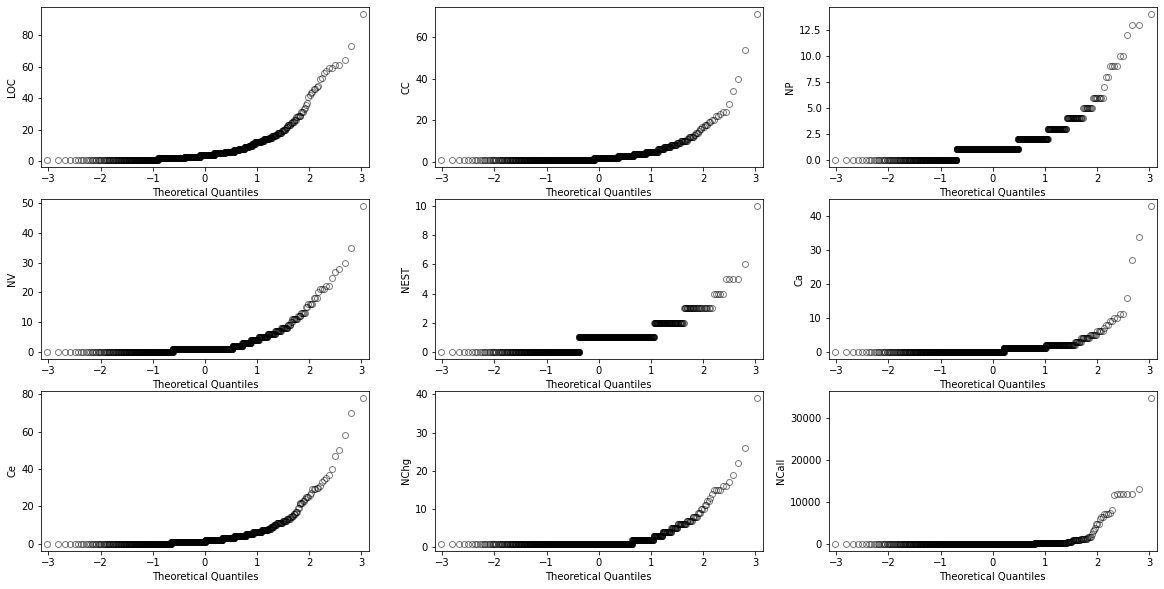

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
ax = axes.flatten()
for i in range(len(list_columns)):
    col_name = list_columns[i]
    sm.qqplot(merged_data[col_name], marker='o', markerfacecolor='none', markeredgecolor='k', alpha=0.5,
              ax = ax[i])
    ax[i].set_ylabel(col_name)

# plt.tight_layout(pad=1.5)
plt.show()

# plt.savefig('C:/Users/aprodea/work/metrics-tax-compare/qqplots_unnormalised_1.pdf', bbox_inches = 'tight', pad_inches = 0)

In [42]:
scaled_data = merged_data.copy()

for col_name in list_columns:
    col = scaled_data[col_name]
    min_col, max_col = col.min(), col.max()
    min_col = 0  # consider min as 0 to perserve the importance of values; eg LOC 25, 50 -> 0.5, 1 
#     print(col_name, min_col, max_col)
    scaled_data[col_name] = (col - min_col) / (max_col - min_col)
    
scaled_data

,Method,LOC,CC,NP,NV,NEST,Ca,Ce,NChg,NCall
0,GES_GRT.GES_GRTCoreModule.PreInitialize(),0.150538,0.042254,0.000000,0.020408,0.1,0.000000,0.025641,0.051282,0.000115
1,GES_GRT.GES_GRTCoreModule.Initialize(),0.010753,0.014085,0.000000,0.000000,0.0,0.000000,0.000000,0.025641,0.000115
2,GES_GRT.GES_GRTCoreModule.PostInitialize(),0.021505,0.014085,0.000000,0.000000,0.0,0.000000,0.012821,0.025641,0.000115
3,GES_GRT.GES_GRTDomainServiceBase.GES_GRTDomain...,0.021505,0.014085,0.000000,0.000000,0.0,0.116279,0.000000,0.025641,0.106956
4,GES_GRT.GES_GRTServiceBase.GES_GRTServiceBase(),0.021505,0.014085,0.000000,0.000000,0.0,0.093023,0.000000,0.025641,0.068034
...,...,...,...,...,...,...,...,...,...,...
799,GES_GRT.Web.App.Startup.AppBundleConfig.Regist...,0.086022,0.014085,0.071429,0.000000,0.0,0.023256,0.038462,0.102564,0.000115
800,GES_GRT.Web.App.Startup.AppBundleConfig.AddApp...,0.010753,0.042254,0.142857,0.000000,0.1,0.023256,0.025641,0.025641,0.000231
801,GES_GRT.Web.App.Startup.AppBundleConfig.AddApp...,0.010753,0.084507,0.142857,0.000000,0.1,0.023256,0.025641,0.025641,0.000231
802,GES_GRT.Web.App.Startup.AppNavigationProvider....,0.021505,0.014085,0.071429,0.000000,0.0,0.000000,0.012821,0.435897,0.000115


In [43]:
hopkins(scaled_data.loc[:, ~scaled_data.columns.isin(['Method'])], scaled_data.shape[0])

0.04017942589817744

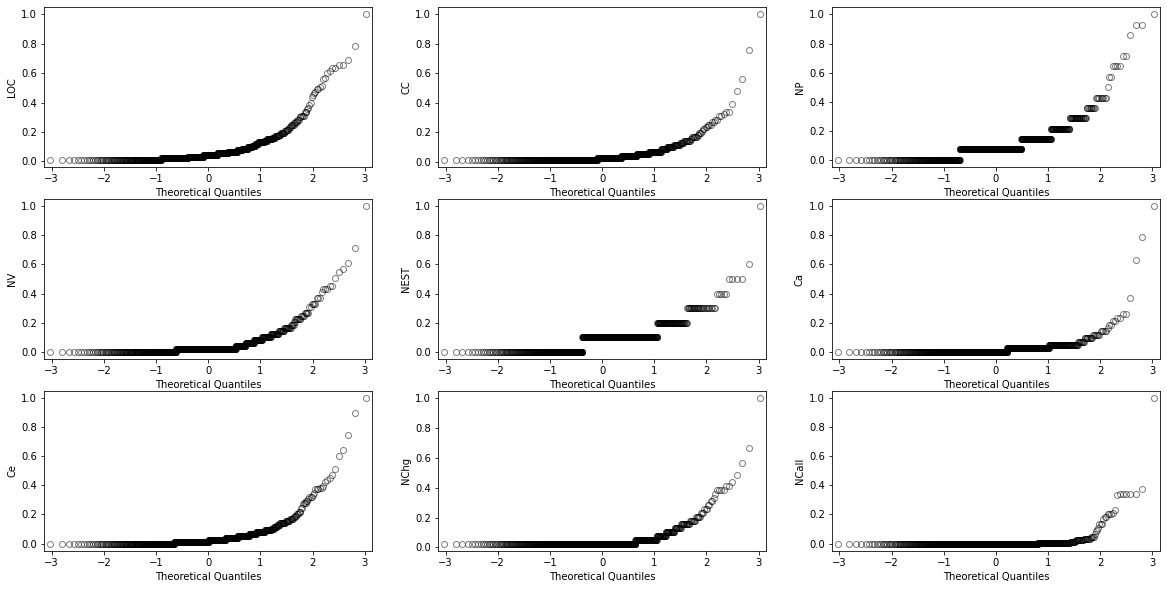

In [44]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
ax= axes.flatten()
for i in range(len(list_columns)):
    col_name = list_columns[i]
    sm.qqplot(scaled_data[col_name], marker='o', markerfacecolor='none', markeredgecolor='k', alpha=0.5,
              ax = ax[i])
    ax[i].set_ylabel(col_name)

# plt.tight_layout(pad=1.5)
plt.show()

In [45]:
scaled_data["CRank"] = scaled_data.sum(axis=1)
min_col, max_col = scaled_data["CRank"].min(), scaled_data["CRank"].max()
print(col_name, min_col, max_col)
scaled_data

NCall 0.05047822085532217 5.124198792132304


,Method,LOC,CC,NP,NV,NEST,Ca,Ce,NChg,NCall,CRank
0,GES_GRT.GES_GRTCoreModule.PreInitialize(),0.150538,0.042254,0.000000,0.020408,0.1,0.000000,0.025641,0.051282,0.000115,0.390238
1,GES_GRT.GES_GRTCoreModule.Initialize(),0.010753,0.014085,0.000000,0.000000,0.0,0.000000,0.000000,0.025641,0.000115,0.050594
2,GES_GRT.GES_GRTCoreModule.PostInitialize(),0.021505,0.014085,0.000000,0.000000,0.0,0.000000,0.012821,0.025641,0.000115,0.074167
3,GES_GRT.GES_GRTDomainServiceBase.GES_GRTDomain...,0.021505,0.014085,0.000000,0.000000,0.0,0.116279,0.000000,0.025641,0.106956,0.284466
4,GES_GRT.GES_GRTServiceBase.GES_GRTServiceBase(),0.021505,0.014085,0.000000,0.000000,0.0,0.093023,0.000000,0.025641,0.068034,0.222288
...,...,...,...,...,...,...,...,...,...,...,...
799,GES_GRT.Web.App.Startup.AppBundleConfig.Regist...,0.086022,0.014085,0.071429,0.000000,0.0,0.023256,0.038462,0.102564,0.000115,0.335931
800,GES_GRT.Web.App.Startup.AppBundleConfig.AddApp...,0.010753,0.042254,0.142857,0.000000,0.1,0.023256,0.025641,0.025641,0.000231,0.370632
801,GES_GRT.Web.App.Startup.AppBundleConfig.AddApp...,0.010753,0.084507,0.142857,0.000000,0.1,0.023256,0.025641,0.025641,0.000231,0.412886
802,GES_GRT.Web.App.Startup.AppNavigationProvider....,0.021505,0.014085,0.071429,0.000000,0.0,0.000000,0.012821,0.435897,0.000115,0.555852


In [12]:
scaled_data.to_csv("C:/Users/aprodea/work/metrics-tax-compare/merged/merged_normalised.csv", sep=';', index=False)

In [46]:
scaled_data["CRank"].describe()

count    804.000000
mean       0.484155
std        0.449198
min        0.050478
25%        0.229997
50%        0.365581
75%        0.573050
max        5.124199
Name: CRank, dtype: float64

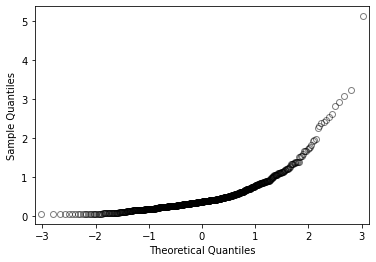

In [47]:
sm.qqplot(scaled_data["CRank"], marker='o', markerfacecolor='none', markeredgecolor='k', alpha=0.5)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

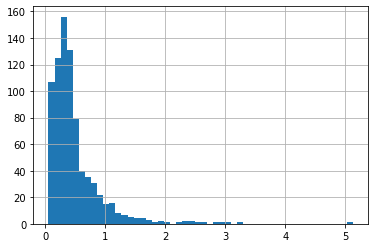

In [48]:
scaled_data["CRank"].hist(bins=50)
plt.show

In [50]:
ordered_scaled_data = scaled_data.sort_values(by='CRank', ignore_index=True)
ordered_scaled_data

,Method,LOC,CC,NP,NV,NEST,Ca,Ce,NChg,NCall,CRank
0,GES_GRT.ClientIncomeComponentGroups.Dto.Client...,0.010753,0.014085,0.000000,0.000000,0.0,0.000000,0.000000,0.025641,0.000000,0.050478
1,GES_GRT.Localization.Dto.GetLanguagesOutput.Ge...,0.010753,0.014085,0.000000,0.000000,0.0,0.000000,0.000000,0.025641,0.000000,0.050478
2,GES_GRT.Chat.ChatMessage.ChatMessage(),0.010753,0.014085,0.000000,0.000000,0.0,0.000000,0.000000,0.025641,0.000000,0.050478
3,GES_GRT.WebApi.Controllers.ImportClientIncomeC...,0.010753,0.014085,0.000000,0.000000,0.0,0.000000,0.000000,0.025641,0.000000,0.050478
4,GES_GRT.WebApi.Controllers.ImportExchangeRates...,0.010753,0.014085,0.000000,0.000000,0.0,0.000000,0.000000,0.025641,0.000000,0.050478
...,...,...,...,...,...,...,...,...,...,...,...
799,GES_GRT.Employees.Exporting.EmployeeListExcelE...,0.634409,0.563380,0.285714,0.367347,0.2,0.023256,0.435897,0.307692,0.000115,2.817811
800,GES_GRT.Employees.EmployeeAppService.SetEmploy...,0.612903,0.394366,0.142857,0.428571,0.3,0.023256,0.641026,0.384615,0.000115,2.927710
801,GES_GRT.Employees.Exporting.EmployeeListExcelE...,0.655914,1.000000,0.142857,0.163265,0.1,0.023256,0.602564,0.384615,0.000115,3.072587
802,GES_GRT.WebApi.Controllers.ImportEmployeesCont...,0.559140,0.338028,0.142857,0.714286,0.3,0.023256,0.743590,0.410256,0.000058,3.231470


In [51]:
n = ordered_scaled_data.shape[0]
first_cut = round(n*0.7)
second_cut = round(n*0.9)

print(first_cut, second_cut, n)

ordered_scaled_data.loc[:first_cut, "CLevel"] = "low"
ordered_scaled_data.loc[first_cut:second_cut, "CLevel"] = "regular"
ordered_scaled_data.loc[second_cut:, "CLevel"] = "high"
ordered_scaled_data

563 724 804


,Method,LOC,CC,NP,NV,NEST,Ca,Ce,NChg,NCall,CRank,CLevel
0,GES_GRT.ClientIncomeComponentGroups.Dto.Client...,0.010753,0.014085,0.000000,0.000000,0.0,0.000000,0.000000,0.025641,0.000000,0.050478,low
1,GES_GRT.Localization.Dto.GetLanguagesOutput.Ge...,0.010753,0.014085,0.000000,0.000000,0.0,0.000000,0.000000,0.025641,0.000000,0.050478,low
2,GES_GRT.Chat.ChatMessage.ChatMessage(),0.010753,0.014085,0.000000,0.000000,0.0,0.000000,0.000000,0.025641,0.000000,0.050478,low
3,GES_GRT.WebApi.Controllers.ImportClientIncomeC...,0.010753,0.014085,0.000000,0.000000,0.0,0.000000,0.000000,0.025641,0.000000,0.050478,low
4,GES_GRT.WebApi.Controllers.ImportExchangeRates...,0.010753,0.014085,0.000000,0.000000,0.0,0.000000,0.000000,0.025641,0.000000,0.050478,low
...,...,...,...,...,...,...,...,...,...,...,...,...
799,GES_GRT.Employees.Exporting.EmployeeListExcelE...,0.634409,0.563380,0.285714,0.367347,0.2,0.023256,0.435897,0.307692,0.000115,2.817811,high
800,GES_GRT.Employees.EmployeeAppService.SetEmploy...,0.612903,0.394366,0.142857,0.428571,0.3,0.023256,0.641026,0.384615,0.000115,2.927710,high
801,GES_GRT.Employees.Exporting.EmployeeListExcelE...,0.655914,1.000000,0.142857,0.163265,0.1,0.023256,0.602564,0.384615,0.000115,3.072587,high
802,GES_GRT.WebApi.Controllers.ImportEmployeesCont...,0.559140,0.338028,0.142857,0.714286,0.3,0.023256,0.743590,0.410256,0.000058,3.231470,high


In [52]:
ordered_scaled_data.to_csv("C:/Users/aprodea/work/metrics-tax-compare/merged/ordered_scaled_data.csv", sep=';', index=False)

In [53]:
ordered_scaled_data.columns

Index(['Method', 'LOC', 'CC', 'NP', 'NV', 'NEST', 'Ca', 'Ce', 'NChg', 'NCall',
       'CRank', 'CLevel'],
      dtype='object')

In [54]:
low_critical = len(ordered_scaled_data[ordered_scaled_data['CLevel'] == "low"])
regular_critical = len(ordered_scaled_data[ordered_scaled_data['CLevel'] == "regular"]) 
high_critical = len(ordered_scaled_data[ordered_scaled_data['CLevel'] == "high"])

print(low_critical, regular_critical, high_critical)

563 161 80


In [55]:
high_critical_data = ordered_scaled_data[ordered_scaled_data['CLevel'] == "high"].reset_index()
high_critical_data

,index,Method,LOC,CC,NP,NV,NEST,Ca,Ce,NChg,NCall,CRank,CLevel
0,724,GES_GRT.Employees.Exporting.EmployeeListExcelE...,0.118280,0.042254,0.285714,0.102041,0.1,0.000000,0.141026,0.153846,0.000115,0.943275,high
1,725,GES_GRT.Authorization.Users.UserAppService.Get...,0.301075,0.112676,0.071429,0.020408,0.1,0.000000,0.243590,0.102564,0.000058,0.951800,high
2,726,GES_GRT.DataExporting.Excel.EpPlus.EpPlusExcel...,0.096774,0.070423,0.285714,0.102041,0.2,0.186047,0.000000,0.025641,0.001818,0.968457,high
3,727,GES_GRT.Extensions.EnumExtension.GetValueFromD...,0.193548,0.112676,0.071429,0.265306,0.3,0.000000,0.000000,0.025641,0.000000,0.968600,high
4,728,GES_GRT.Extensions.EnumExtension.GetFlags<T>(T...,0.193548,0.140845,0.142857,0.224490,0.2,0.046512,0.000000,0.025641,0.000000,0.973893,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,799,GES_GRT.Employees.Exporting.EmployeeListExcelE...,0.634409,0.563380,0.285714,0.367347,0.2,0.023256,0.435897,0.307692,0.000115,2.817811,high
76,800,GES_GRT.Employees.EmployeeAppService.SetEmploy...,0.612903,0.394366,0.142857,0.428571,0.3,0.023256,0.641026,0.384615,0.000115,2.927710,high
77,801,GES_GRT.Employees.Exporting.EmployeeListExcelE...,0.655914,1.000000,0.142857,0.163265,0.1,0.023256,0.602564,0.384615,0.000115,3.072587,high
78,802,GES_GRT.WebApi.Controllers.ImportEmployeesCont...,0.559140,0.338028,0.142857,0.714286,0.3,0.023256,0.743590,0.410256,0.000058,3.231470,high


In [22]:
high_critical_data.to_csv("C:/Users/aprodea/work/metrics-tax-compare/merged/high_critical_data.csv", sep=';', index=False)

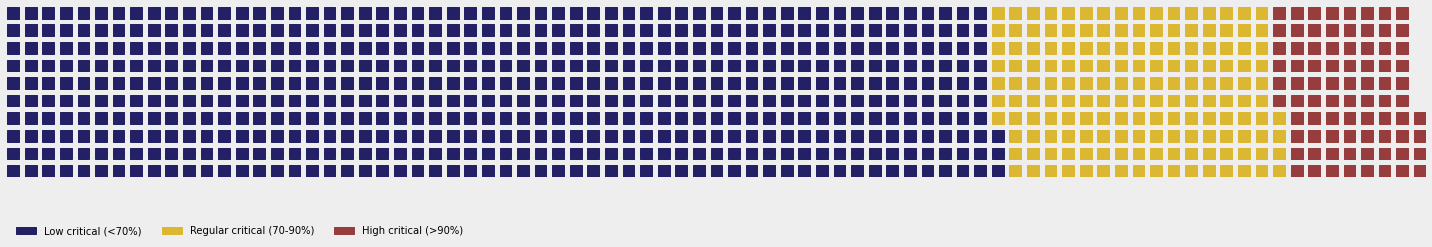

In [36]:
from pywaffle import Waffle

data = {'Low critical': low_critical, 'Regular critical': regular_critical, 'High critical': high_critical}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#232066", "#DCB732", "#983D3D"),
    labels=['Low critical (<70%)', 'Regular critical (70-90%)', 'High critical (>90%)'],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    interval_ratio_x=0.5,
    interval_ratio_y=0.5,
    figsize=(20,10)
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()

In [37]:
high_critical_data.describe()

,index,LOC,CC,NP,NV,NEST,Ca,Ce,NChg,NCall,CRank
count,80.0000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,763.5000,0.278804,0.154286,0.229464,0.212245,0.22500,0.039244,0.191827,0.119408,0.017345,1.467623
std,23.2379,0.198627,0.161934,0.223778,0.184707,0.15549,0.114923,0.208153,0.175857,0.113245,0.689723
min,724.0000,0.010870,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.897742
25%,743.7500,0.141304,0.053571,0.071429,0.076531,0.10000,0.000000,0.012821,0.000000,0.000000,1.044108
50%,763.5000,0.211957,0.114286,0.142857,0.173469,0.20000,0.023256,0.141026,0.052632,0.000087,1.206001
75%,783.2500,0.364130,0.192857,0.285714,0.306122,0.30000,0.023256,0.294872,0.157895,0.000433,1.629512
max,803.0000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,5.120778


KeyError: "None of [Index(['CLevel'], dtype='object')] are in the [columns]"

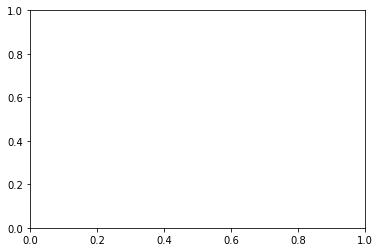

In [38]:
ordered_scaled_data.boxplot(column='CLevel')